In [1]:
pip install pandas pyarrow matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from pandas.tseries.holiday import USFederalHolidayCalendar as calander

In [3]:

# Path to the directory where all your Parquet files are stored
path = '/Users/md/Desktop/python_project/parquet_files'  # Update the path accordingly

# Dictionary to store row counts from each file
row_counts = {}

# Read each Parquet file and count the rows
all_files = glob.glob(path + "/*.parquet")
dataframes = []
for file in all_files:
    temp_df = pd.read_parquet(file)
    row_counts[file] = len(temp_df)
    dataframes.append(temp_df)

# Concatenate all dataframes into a single DataFrame
df = pd.concat(dataframes)


In [4]:
# Total row count from the DataFrame
total_rows_df = len(df)

# Total row count from individual files
total_rows_files = sum(row_counts.values())

# Compare the counts
print(f"Total rows in DataFrame: {total_rows_df}")
print(f"Expected total rows from files: {total_rows_files}")
print(f"Row count match: {total_rows_df == total_rows_files}")


Total rows in DataFrame: 38310226
Expected total rows from files: 38310226
Row count match: True


In [5]:
# Printing row counts for each file
for file, count in row_counts.items():
    print(f"{file}: {count} rows")


/Users/md/Desktop/python_project/parquet_files/yellow_tripdata_2023-06.parquet: 3307234 rows
/Users/md/Desktop/python_project/parquet_files/yellow_tripdata_2023-07.parquet: 2907108 rows
/Users/md/Desktop/python_project/parquet_files/yellow_tripdata_2023-05.parquet: 3513649 rows
/Users/md/Desktop/python_project/parquet_files/yellow_tripdata_2023-04.parquet: 3288250 rows
/Users/md/Desktop/python_project/parquet_files/yellow_tripdata_2023-08.parquet: 2824209 rows
/Users/md/Desktop/python_project/parquet_files/yellow_tripdata_2023-11.parquet: 3339715 rows
/Users/md/Desktop/python_project/parquet_files/yellow_tripdata_2023-01.parquet: 3066766 rows
/Users/md/Desktop/python_project/parquet_files/yellow_tripdata_2023-10.parquet: 3522285 rows
/Users/md/Desktop/python_project/parquet_files/yellow_tripdata_2023-09.parquet: 2846722 rows
/Users/md/Desktop/python_project/parquet_files/yellow_tripdata_2023-12.parquet: 3376567 rows
/Users/md/Desktop/python_project/parquet_files/yellow_tripdata_2023-02

In [6]:
# Trip data provided
trip_data = {
    '2023-06': 3307234,
    '2023-07': 2907108,
    '2023-05': 3513649,
    '2023-04': 3288250,
    '2023-08': 2824209,
    '2023-11': 3339715,
    '2023-01': 3066766,
    '2023-10': 3522285,
    '2023-09': 2846722,
    '2023-12': 3376567,
    '2023-02': 2913955,
    '2023-03': 3403766
}

# Create DataFrame for plotting
plot_data = pd.DataFrame(list(trip_data.items()), columns=['Month_Year', 'Trip_Counts'])
plot_data['Month_Year'] = pd.to_datetime(plot_data['Month_Year'])
plot_data.sort_values('Month_Year', inplace=True)
plot_data['Month_Year'] = plot_data['Month_Year'].dt.strftime('%Y-%m')  # Formatting for nicer axis labels


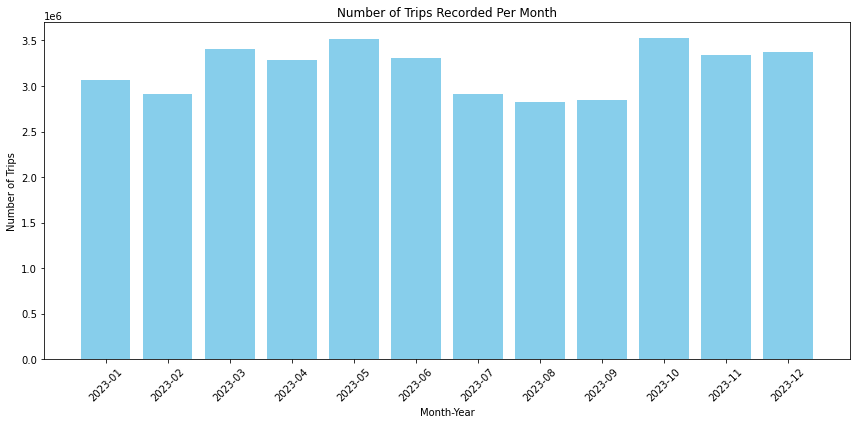

In [7]:
plt.figure(figsize=(12, 6))
plt.bar(plot_data['Month_Year'], plot_data['Trip_Counts'], color='skyblue')
plt.xlabel('Month-Year')
plt.ylabel('Number of Trips')
plt.title('Number of Trips Recorded Per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Distribution of trip records per month for 2023, we can see that for each month the record number is relatively the same however, we can observe that for March, May, October, November and December record count is a bit higher.

In [8]:
df.head(1)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1.00,3.40,1.00,N,140,238,1,21.90,3.50,0.50,6.70,0.00,1.00,33.60,2.50,0.00,NaN


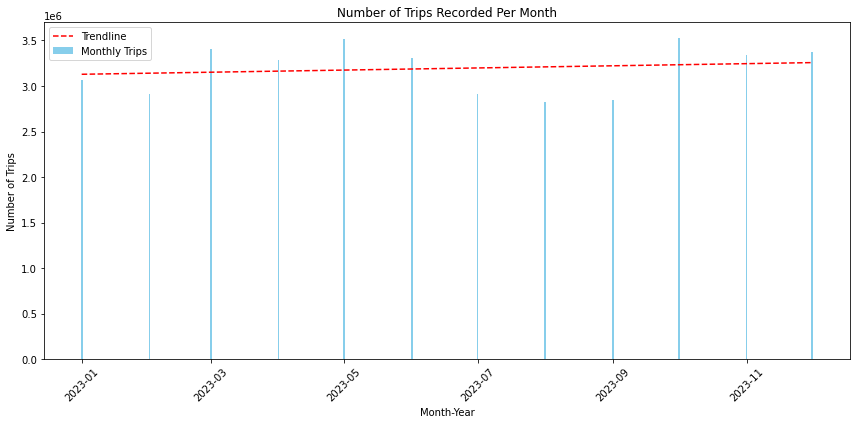

In [9]:

# Assuming 'plot_data' is your DataFrame prepared previously
plot_data['Month_Year'] = pd.to_datetime(plot_data['Month_Year'])
plot_data.sort_values('Month_Year', inplace=True)

plt.figure(figsize=(12, 6))
plt.bar(plot_data['Month_Year'], plot_data['Trip_Counts'], color='skyblue', label='Monthly Trips')
plt.xlabel('Month-Year')
plt.ylabel('Number of Trips')
plt.title('Number of Trips Recorded Per Month')

# Calculate and plot a trendline
z = np.polyfit(mdates.date2num(plot_data['Month_Year']), plot_data['Trip_Counts'], 1)
p = np.poly1d(z)
plt.plot(plot_data['Month_Year'], p(mdates.date2num(plot_data['Month_Year'])), "r--", label='Trendline')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* No Clear Seasonal Trend: The number of trips doesn't show a clear and consistent pattern that rises and falls at regular intervals throughout the year, which is typically indicative of strong seasonality.
* Monthly Variations: There are variations in the number of trips per month, but these do not appear to follow a simple seasonal pattern. For example, we do not see a continuous increase or decrease that corresponds with specific seasons.
* Mid-Year Dip: There seems to be a dip in the number of trips around July and August. This could be due to various factors such as summer holidays when people might leave the city, or it could be a seasonal variation. However, without data from multiple years, it's difficult to attribute this dip to seasonality with certainty.
* End-of-Year Increase: Towards the end of the year, there seems to be an increase in trips, particularly in December. This could be related to the holiday season, which typically sees an increase in travel and activities.
* Stability in Other Months: Aside from the mid-year dip and end-of-year increase, the other months seem relatively stable, with no dramatic rises or falls in the number of trips.
* Trendline: The red dashed trendline appears relatively flat, indicating that, overall, there isn't a strong increasing or decreasing trend across these months.


Your project aims to analyze the NYC yellow taxi trip dataset, specifically from 2021, to develop a predictive model for taxi fares that can be adapted for Tbilisi's taxi services. The goal is to create a structured and transparent fare system that can inform policy changes and technological adoption in Tbilisi, contributing to a more regulated taxi market.

From your abstract, it's clear that the NYC taxi dataset serves as a comprehensive, regulated example to contrast with the unregulated environment of Tbilisi, offering a structured framework for fare calculation with regulated fares based on distance, time, and additional surcharges. You plan to utilize machine learning techniques to predict fares by examining variables like trip distance, timing, and external conditions such as weather and public events.

In terms of seasonality, your abstract and introduction do not directly state that seasonality is a primary focus. However, the model aims to explore key features that impact fare variability, which might include seasonal factors. Given that demand for taxis can indeed be influenced by seasonality due to tourism trends, weather conditions, and public holidays, it might be beneficial to include seasonality as a feature in your predictive model.

Creating a seasonal feature involves categorizing data into seasons (spring, summer, autumn, winter) and analyzing how these categories correlate with fare amounts. If the data shows consistent patterns in trip demand across the same seasons year over year, it would justify including a seasonal feature in your model.

In summary, based on the provided overview, you should consider the following:

Include Seasonality if Relevant: If your initial EDA and literature review suggest that seasonal factors significantly affect taxi demand and fare prices in NYC, it would be reasonable to include a seasonal feature in your predictive model. This could then be considered in the context of Tbilisi when proposing policy changes or technological adaptations.
Model Adaptation: When adapting your model to Tbilisi's context, remember that direct translations of seasonal impacts from NYC may not apply. Consider local seasonal factors that could affect Tbilisi differently, such as variations in weather, tourism patterns, and cultural events throughout the year.
Comparative Analysis: Use the NYC model as a starting point and compare it with any available data from Tbilisi. If direct data on seasonality is not available for Tbilisi, use proxy indicators (e.g., tourism data, weather patterns) to hypothesize the potential seasonal effects on taxi demand and fares.
Policy Implications: Your recommendations for Tbilisi should take into account the findings from the model, including any seasonal effects observed. Any policy or technological recommendations should be adaptable to the unique seasonal dynamics of the region.

## Dataset Overview

In the section below we take a look at the overall dataset for 2023, look at the null values and determine the next steps for cleaning, preprocessing and feature engineering.

| Field Name                  | Description |
|-----------------------------|-------------|
| `VendorID`                  | A code indicating the TPEP provider that provided the record. <br> 1 = Creative Mobile Technologies, LLC; <br> 2 = VeriFone Inc. |
| `tpep_pickup_datetime`      | The date and time when the meter was engaged. |
| `tpep_dropoff_datetime`     | The date and time when the meter was disengaged. |
| `Trip_distance`             | The elapsed trip distance in miles reported by the taximeter. |
| `PULocationID`              | TLC Taxi Zone in which the taximeter was engaged. |
| `DOLocationID`              | TLC Taxi Zone in which the taximeter was disengaged. |
| `Passenger_count`           | The number of passengers in the vehicle. This is a driver-entered value. |
| `RateCodeID`                | The final rate code in effect at the end of the trip. <br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br> 4 = Nassau or Westchester <br> 5 = Negotiated fare <br> 6 = Group ride |
| `Store_and_fwd_flag`        | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka "store and forward," because the vehicle did not have a connection to the server. <br> Y = store and forward trip <br> N = not a store and forward trip |
| `Payment_type`              | A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br> 2 = Cash <br> 3 = No charge <br> 4 = Dispute <br> 5 = Unknown <br> 6 = Voided trip |
| `Fare_amount`               | The time-and-distance fare calculated by the meter. |
| `Extra`                     | Miscellaneous extras and surcharges. Currently, this only includes the 0.50 and 1 rush hour and overnight charges. |
| `MTA_tax`                   | 0.50 MTA tax that is automatically triggered based on the metered rate in use. |
| `Improvement_surcharge`     | 0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
| `Tip_amount`                | Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| `Tolls_amount`              | Total amount of all tolls paid in trip. |
| `Total_amount`              | The total amount charged to passengers. Does not include cash tips. |
| `Congestion_Surcharge`      | Total amount collected in trip for NYS congestion surcharge. |
| `Airport_fee`               | 1.25 for pick up only at LaGuardia and John F. Kennedy Airports. |


### Descriptive Stats

In [10]:
# Assuming 'df' is your DataFrame
print(df.describe())

         VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
count 38310226.00      37000870.00    38310226.00 37000870.00   38310226.00   
mean         1.74             1.37           4.09        1.64        165.18   
std          0.44             0.89         241.25        7.43         64.00   
min          1.00             0.00           0.00        1.00          1.00   
25%          1.00             1.00           1.04        1.00        132.00   
50%          2.00             1.00           1.79        1.00        162.00   
75%          2.00             1.00           3.40        1.00        234.00   
max          6.00             9.00      345729.44       99.00        265.00   

       DOLocationID  payment_type  fare_amount       extra     mta_tax  \
count   38310226.00   38310226.00  38310226.00 38310226.00 38310226.00   
mean         163.95          1.18        19.52        1.56        0.49   
std           69.86          0.56        75.73        2.45        

We see already that some features have null values in them which we will analyze and adjust accordinlgy in the sections below. 
## Descriptive Statistics Overview

The descriptive statistics provide a detailed summary of the data related to NYC taxi trips. Below is the interpretation of each column's statistics:

### General Statistics

- **Count**: Indicates the total number of non-missing entries for each feature.
- **Mean**: Represents the average value across all entries for each feature.
- **Std (Standard Deviation)**: Shows the amount of variation or dispersion from the average.
- **Min (Minimum)**: The smallest value found in each feature.
- **25% (1st Quartile)**: A quarter of the entries are below this value.
- **50% (Median)**: The middle value when the data is ordered from least to greatest.
- **75% (3rd Quartile)**: Three-quarters of the entries are below this value.
- **Max (Maximum)**: The largest value found in each feature.

### Feature-Specific Statistics

- **VendorID**:
  - Values range from 1 to 6, indicating different TPEP providers.
  - Most trips are evenly split between the providers.

- **Passenger Count**:
  - The number of passengers ranges from 0 to 9 per trip.
  - The majority of trips carry just one passenger.

- **Trip Distance**:
  - Distances range from 0 to 345,729.44 (likely indicating outliers or data errors).
  - The average trip is approximately 4.09 miles, though the median value is lower at 1.79 miles, which suggests that there are some very long trips skewing the average higher.

- **RatecodeID**:
  - A majority of trips use the standard rate (code 1), with some outliers using code as high as 99 (which may indicate special rates or data errors), this is a ctaegorical feature that tells us what type of fare was used 99 based on the data dictionary indicates unknown or null.

- **PULocationID** and **DOLocationID** (Pickup and Dropoff Location IDs)**:
  - Both feature IDs range from 1 to 265, which corresponds to pre-defined taxi zones in NYC.
  - The average pickup and dropoff locations are around the mid-160s, but this wide range suggests that taxis service a broad area of the city.

- **Payment Type**:
  - Ranges from 0 to 5, indicating different forms of payment.
  - Most trips are paid with type 1, which based on our data dict indicate payments made by credit card

- **Fare Amount**:
  - Fares range from -1087.30 to 386,983.63, showing that there are likely errors or outliers in the data as negative fares and excessively high fares are not feasible.

- **Extra Charges** (like late-night or rush hour fees)**:
  - Values range from -39.17 to 10,002.50, also indicating potential data entry errors or outliers.

- **MTA Tax**:
  - Ranges from -0.50 to 53.16, with most trips showing the standard MTA tax of 0.50.

- **Tip Amount**:
  - Tips range from -411 to 4,174, with a mean tip of approximately 3.52.

- **Tolls Amount**:
  - Toll amounts have a wide range from -91.30 to 665.56, again suggesting some outliers or errors.

- **Improvement Surcharge**:
  - This has a smaller range of values, mostly being the standard surcharge of 1.00, but with a minimum indicating an erroneous entry at -1.00.

- **Total Amount**:
  - The total amount paid, including all surcharges and fees, ranges from -1094.05 to 386,987.63, which includes potential outliers or incorrect charges.

- **Congestion Surcharge**:
  - Reflects additional charges during peak times in congested areas, with most trips incurring the standard congestion surcharge of 2.50.

- **Airport Fee**:
  - Not all entries have airport fees, but for those that do, they range from -1.75 to 1.75, with negative values indicating potential data errors.

### Observations and Actionable Insights

The dataset contains some inconsistencies and potential errors, particularly in `trip_distance`, `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, and `total_amount`. Before using this data for further analysis or model training, it's essential to perform data cleaning to remove or correct these outliers and erroneous entries. This will ensure the integrity and reliability of any conclusions drawn or predictive models developed from this dataset.



### Null Values 

Below we will look at columns with null values and devise a strategy based on our knowledge and best practices on how to handle them.

In [11]:
# Count of null values per column
print(df.isnull().sum())


VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count           1309356
trip_distance                   0
RatecodeID                1309356
store_and_fwd_flag        1309356
PULocationID                    0
DOLocationID                    0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge      1309356
Airport_fee               4304379
airport_fee              35315203
dtype: int64


* Passenger count has null values which might be due to the fact that they are entered manually by taxi driver it might be data entry errors passenger count can be filed in using mode the most common passanger count.

* ratecodeID also has empty values the same number as passanger count and congestion surcharge this all could be due to the data entry or processing errors. RateCodeID is a categorical variable that has different categories as the most common category based on descriptive statistics is 1 we can include 1 for our null values or add new category 7 which indicates- unknown

* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka "store and forward," because the vehicle did not have a connection to the server the fact that this and other values have same number of missing values could indicate the fact that there was an issue of data collection. This column is not relavant for our analytical purposes thus we can fill the missing values with N stating that the records are not stored in the vehicle memory as the data is missing.

* congestion surcharge - can be filled in with the most common amount for this feature.

* airport-fee has missing values as not all the trips are airport trips and that is logical we can fill in the missing rows with 0-s assuming that the rows that do not have airport fee in them were not airport trips.  seem to have a significant number of missing values. Before taking action, investigate why these values are missing. If they're missing at random or because the trips didn't involve an airport, you might set them to 0.0. If the missing data is a substantial portion of the dataset, consider more complex imputation methods or keep them as NaN if the model can handle it.

## Handling Null Values

#### Passanger Count
We fill passanger count with median he median is computed only from the non-null values in passenger_count. This ensures that the median calculation is accurate and not influenced by existing NaN values.
Fill NaNs: Replacing NaNs with this median value ensures that you're not artificially deflating or inflating the typical passenger count.

In [12]:
# Fill missing values for 'passenger_count' with the median
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

#### RatecodeID

We fill ratecode ID with 1 as this is the most common data point.  

In [13]:
# Fill missing values for 'RatecodeID' with the most common value, which is typically 1 for standard rate
df['RatecodeID'].fillna(1, inplace=True)


#### store_and_fwd_flag
We fill in missing values with N.

In [14]:
# Fill missing values for 'store_and_fwd_flag' with 'N'
df['store_and_fwd_flag'].fillna('N', inplace=True)

#### congestion_surcharge

For congestion surcharge we assume that missing values as 0's meaning that the trips did not have congestion surcharge. 

In [15]:
# Fill missing values for 'congestion_surcharge' with 0.0
df['congestion_surcharge'].fillna(0.0, inplace=True)

### Airport Fees

Airports fees can have missing values the number of missinbg values being this large indicates that tehre were not many airport trips the fact that we have 2 columns with airport fees populated and with diffrent number of missing entries indicates issues with data processing, based on our literature review we know thta this field was added to data collection around 2022 and is relatively new so there might be issues with data fetching or processing for this field as well thus we have 2 features. 

As we know $1.25 for pick up only at LaGuardia and John F. Kennedy Airports thus based on our descriptive statistics we know that airport fee has min max of 1.25 which indicates that this is the rate for JFK and laguardia and that 1.75 for other Airports.


In [16]:


# If after your investigation you decide to keep both columns, you may want to rename them for clarity
#$1.25 for pick up only at LaGuardia and John F. Kennedy Airports based on our descirptive stats we decided
#to rename our columns accordingly 

# Renaming columns for clarity
df.rename(columns={
    'Airport_fee': 'General_Airport_Fee',  # This seems to be a more general or incorrectly applied fee.
    'airport_fee': 'JFK_LGA_Pickup_Fee'  # This is clearly the specific fee for JFK and LaGuardia as described.
}, inplace=True)

# Print new column names to confirm
print("Updated column names:")
print(df.columns)



Updated column names:
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'General_Airport_Fee',
       'JFK_LGA_Pickup_Fee'],
      dtype='object')


In [17]:
# Handle 'Airport_fee' based on domain knowledge, for example, setting missing values to 0.0
df['General_Airport_Fee'].fillna(0.0, inplace=True)
df['JFK_LGA_Pickup_Fee'].fillna(0.0, inplace=True)

In [18]:
print(df['General_Airport_Fee'].describe())
print(df['JFK_LGA_Pickup_Fee'].describe())

count   38310226.00
mean           0.13
std            0.45
min           -1.75
25%            0.00
50%            0.00
75%            0.00
max            1.75
Name: General_Airport_Fee, dtype: float64
count   38310226.00
mean           0.01
std            0.10
min           -1.25
25%            0.00
50%            0.00
75%            0.00
max            1.25
Name: JFK_LGA_Pickup_Fee, dtype: float64


now we see that there are no missing values in airport fees and we know better understand the 2 columns what they stand for. We can also check if the applied rates are correct so where 0 is for one type of airport fee the other is fille dor also 0.

##### Check again for any prevailing null values 

In [19]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
General_Airport_Fee      0
JFK_LGA_Pickup_Fee       0
dtype: int64

### Understanding and Working with Data Types in the dataset

Below we look at the data types for each column in the dataset and if based on our knowledge and data dictionary provided by NYC taxi services we see discrepancies in the data type and feature we will adjust accordingly.

In [20]:
# Check the data types
print(df.dtypes)


VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
General_Airport_Fee             float64
JFK_LGA_Pickup_Fee              float64
dtype: object


For categorical data types that we know are categorical from our data dictionary we can convert the numeric data types to categorical for modeling and feature engineering purpouses. 

Categorical Data is: 

* RatecodeID
* store_and_fwd_flag
* payment_type

In [21]:
# Convert categorical columns to 'category' data types
categorical_columns = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Confirm changes
df.dtypes


VendorID                       category
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                     category
store_and_fwd_flag             category
PULocationID                      int64
DOLocationID                      int64
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
General_Airport_Fee             float64
JFK_LGA_Pickup_Fee              float64
dtype: object

* Convert passenger_count to int64 after ensuring all NaN values are addressed (if applicable).
* Convert PULocationID and DOLocationID to category, which can be beneficial for memory efficiency and performance when processing large datasets, especially if these fields are used more for grouping or identification rather than calculations.


In [25]:
# Convert 'passenger_count' to integer type
df['passenger_count'] = df['passenger_count'].astype(int)

# Convert location IDs to categorical
df['PULocationID'] = df['PULocationID'].astype('category')
df['DOLocationID'] = df['DOLocationID'].astype('category')

# Confirm changes
print(df.dtypes)

VendorID                       category
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                     category
store_and_fwd_flag             category
PULocationID                   category
DOLocationID                   category
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
General_Airport_Fee             float64
JFK_LGA_Pickup_Fee              float64
dtype: object


## Data Cleaning Continued 

* Removing or correcting outliers: Especially in columns like fare_amount, trip_distance, and others where you've noticed extreme values.
* Dealing with duplicates: If applicable, check for and remove duplicate records to ensure the integrity of your analysis.
* Further handling of NaN values: Based on the strategy you decide (removal, imputation, etc.), consistently apply it across relevant features.


### 1. Removing & Correcting Outliers

We can see that there are some unusual fare amounts as well as large trip dictances that might be due to erro in collecting data or technical glitch, we need to ensure that this outliers are adressed correctly to reduce and normalise the dataset for modeling.

#### 1. Fare Amount
Issue: Extremes such as -1087.30 and 386983.63 suggest errors or outliers.

Given the extremes observed in your data, such as fares as low as -1087.30 and as high as 386983.63, a combination of both methods might be beneficial:

1. **Initial Clean-up with Defined Thresholds:** Given the nature of taxi fare regulations and typical billing practices, start by setting reasonable bounds on what a taxi fare should be (e.g., fares must be non-negative and no more than 500). This initial clean-up can remove the most glaring errors or impossible values.

2. **Refinement with IQR:** After the initial clean-up, use the IQR method to further refine the data and remove more subtle outliers. This ensures that your data does not contain improbable values that might be due to data entry errors or other anomalies but aren't as extreme as those initially removed.




count   34339022.00
mean          14.59
std            8.07
min            0.00
25%            8.60
50%           12.80
75%           18.40
max           40.80
Name: fare_amount, dtype: float64


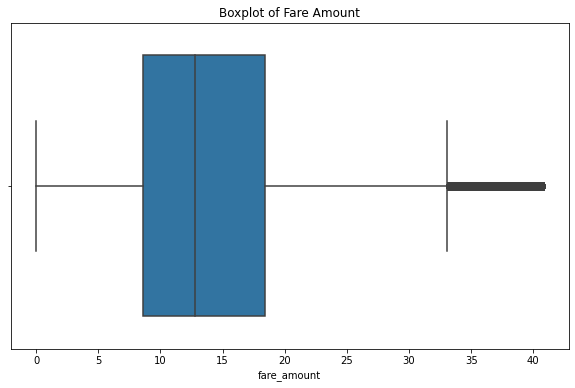

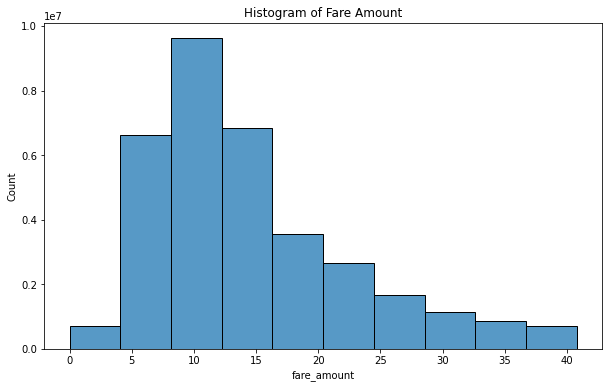

In [26]:
# Define initial thresholds
df['fare_amount'] = df['fare_amount'].clip(lower=0, upper=500)  # Cap fares at $500 and floor at $0
df['total_amount'] = df['total_amount'].clip(lower=0, upper=500)
df['tip_amount'] = df['tip_amount'].clip(lower=0, upper= 100)
# Calculate IQR and apply it to further clean the data
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers beyond the IQR bounds
df = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]

# Review the updated data
print(df['fare_amount'].describe())

# Boxplot for visual inspection of outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.show()


# Histogram of 'fare_amount'
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=10, kde=False)
plt.title('Histogram of Fare Amount')
plt.show()

### 2. Other Amounts 
We will adress outliers here using the domain knowldega and information collected from NYC taxi trip page. 

####  **Extra**
- **Issue:** Negative values and extremely high values like 10002.50.
- **Solution:** Set reasonable limits based on typical surcharges.

#### **MTA Tax**
- **Issue:** Negative values don't make sense for a tax.
- **Solution:** Ensure all tax values are non-negative and within expected range.

#### **Tip Amount**
- **Issue:** Negative tips are not plausible.
- **Solution:** Tips should be non-negative and capped at a reasonable value based on fare.

####  **Tolls Amount**
- **Issue:** Negative tolls are incorrect.
- **Solution:** Ensure tolls are non-negative and below a threshold where applicable.

#### **Total Amount**
- **Issue:** Extremely negative or high values.
- **Solution:** Total should logically be at least the base fare plus other positive contributions (tips, tolls, taxes).

In [27]:
df['extra'] = df['extra'].clip(lower=0, upper=100)
df['mta_tax'] = df['mta_tax'].clip(lower=0.50, upper=0.60)
df['tolls_amount'] = df['tolls_amount'].clip(lower=0, upper=50)
df['improvement_surcharge'] = df['improvement_surcharge'].clip(lower=1.00, upper=1.00)
df['congestion_surcharge'] = df['congestion_surcharge'].clip(lower=2.50, upper=2.75)
df['General_Airport_Fee'] = df['General_Airport_Fee'].clip(lower=0, upper=1.75)
df['JFK_LGA_Pickup_Fee'] = df['JFK_LGA_Pickup_Fee'].clip(lower=0, upper=1.25)

### Trip Distance and Passanger count 

Based on domain knowledge and law we need to limit the passanger count to 6 as that is the maximum passenger number in Taxis permited as for the trip distance the logical trip distance within the city and to the iarports that we can consider is 100 miles as well as trip distances should not be lower than 2 miles this are t

In [28]:
df['passenger_count'] = df['passenger_count'].clip(lower = 1, upper=6)
df['trip_distance'] = df['trip_distance'].clip(lower= 1, upper=100)

### Results

In [ ]:
df.describe()

In [ ]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of columns to plot
columns = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
           'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
           'congestion_surcharge', 'General_Airport_Fee', 'JFK_LGA_Pickup_Fee']

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

# Flatten the array of axes for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of columns to plot
columns = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
           'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
           'congestion_surcharge', 'General_Airport_Fee', 'JFK_LGA_Pickup_Fee']

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

# Flatten the array of axes for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df['total_amount'] = df['total_amount'].clip(lower=0, upper=500)
df['tip_amount'] = df['tip_amount'].clip(lower=0, upper=200)

Based on the box plots provided, we can infer the following about the data:

1. **Passenger Count**: Outliers are not significant here, as all counts are within an expected range (0 to 6 passengers).

2. **Trip Distance**: Most data points are clustered near the lower end, but there are a few extreme outliers. Since the maximum distance has already been capped at 100 miles, which seems reasonable for a taxi trip, you could leave these outliers if they represent legitimate long-distance trips, or further investigate if there are errors in data entry.

3. **Fare Amount**: This looks fairly normal except for a few extreme outliers. These outliers may need to be investigated or capped further if they are unrealistic.

4. **Extra**: There are a few outliers which are significantly higher than the main distribution of the data. You may consider capping this based on a reasonable expectation of charges (e.g., nighttime or peak hour surcharges).

5. **MTA Tax**: The data is tightly concentrated around $0.50, with no visible outliers. This appears to be correctly capped already.

6. **Tip Amount**: The outliers stretch significantly, indicating very large tips. We capped tips at 200 which is reasonable amount for  a taxi trip the max amount based on our resarch was 100 but I decided to leave more.

7. **Tolls Amount**: While there are outliers, if they correspond to actual tolls paid on long-distance trips, they may be legitimate. You could verify if these toll amounts make sense or cap them at a maximum value if they are due to data entry errors.

8. **Improvement Surcharge**: All data points are at $1.00, as expected.

9. **Total Amount**: There are outliers present. You may want to cap this at a value that is consistent with the maximum possible fare, accounting for all possible surcharges and fees.

10. **Congestion Surcharge**: The congestion surcharge is tightly clustered around $2.50, with no outliers.

11. **General Airport Fee**: There are outliers present that are significantly higher than the standard fee. Further investigation into these outliers is necessary.

12. **JFK_LGA_Pickup Fee**: Most values are clustered around zero, with a few outliers. If the outliers don't make sense based on domain knowledge (e.g., fees higher than the regulated airport pickup fees), they should be addressed.



In [ ]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

# Flatten the array of axes for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(columns):
    sns.histplot(df[col], bins=30, kde=False, ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of columns to plot
columns = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
           'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
           'congestion_surcharge', 'General_Airport_Fee', 'JFK_LGA_Pickup_Fee']

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

# Flatten the array of axes for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout()
plt.show()


### removing duplicates

To ensure data entegrity it is also important to remove any dulicate values

In [ ]:
chunk_size = 500000  # Number of rows per chunk; adjust based on your system's memory capacity
chunks = [x for x in np.array_split(df, np.arange(chunk_size, len(df), chunk_size))]

# Remove duplicates from each chunk
deduped_chunks = [chunk.drop_duplicates().reset_index(drop=True) for chunk in chunks]

# Concatenate the chunks back together
df_deduped = pd.concat(deduped_chunks, ignore_index=True)

print("New DataFrame size after removing duplicates:", df_deduped.shape)



In [ ]:
df = df_deduped

# Feature Engineering

It seems you are ready to progress to more advanced stages of your data analysis. Here are some steps you can take:

1. **Feature Engineering**: Introduce new features that could be significant for the model:
    - **Time of Day**: Create a new feature based on the `tpep_pickup_datetime` and `tpep_dropoff_datetime` that categorizes each trip into time slots such as morning, afternoon, evening, and night.
    - **Seasons**: Add a feature for the season of the year the trip took place in.
    - **Passenger Count Categories**: Classify the `passenger_count` into categories like low (1), medium (2-4), and high (5-6).
    - **Weekday/Weekend**: Determine whether the trip took place on a weekday or weekend.

2. **Standardization and Normalization**: If your model requires it, scale your features to have a mean of 0 and a standard deviation of 1, or normalize them to be between 0 and 1.

3. **Correlation Check**: Use Pearson or Spearman correlation to check how strongly your features are related to the target variable (`fare_amount`), and to each other, which can help in reducing multicollinearity.

4. **Segmentation**: Consider creating segments within your data based on geography (zones), time (rush hour, non-rush hours), and trip types (airport, non-airport) for more targeted analysis.

5. **Handling Missing Values and Duplicates**: Ensure that all missing values are handled appropriately (whether filled or dropped), and remove any duplicates to clean the dataset.

6. **Visualization**: Use visual tools like box plots and histograms to understand distributions and outliers after feature engineering.

7. **Hypothesis Testing**: If there are specific assumptions or hypotheses you want to test (like the impact of weather on fares), this would be the time to conduct such tests using statistical methods.

8. **Model Training and Validation**: Start with simpler models and gradually move to more complex ones. Use cross-validation to assess model performance and avoid overfitting.



In [ ]:


# Assuming 'df' is your main DataFrame

# Convert the pickup and dropoff datetime to pandas datetime format if not already
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Time of day segmentation
df['pickup_time_of_day'] = df['tpep_pickup_datetime'].dt.hour.apply(lambda x: 'morning' if 5 <= x <= 11
                                                                           else 'afternoon' if 12 <= x <= 17
                                                                           else 'evening' if 18 <= x <= 23
                                                                           else 'night')

# Seasons segmentation
df['pickup_season'] = df['tpep_pickup_datetime'].dt.month.apply(lambda x: 'spring' if 3 <= x <= 5
                                                                       else 'summer' if 6 <= x <= 8
                                                                       else 'autumn' if 9 <= x <= 11
                                                                       else 'winter')

# Passenger count categories
df['passenger_count_category'] = pd.cut(df['passenger_count'], bins=[0, 1, 4, 6], include_lowest=True, 
                                        labels=['low', 'medium', 'high'])

# Weekday/Weekend segmentation
df['pickup_day_type'] = df['tpep_pickup_datetime'].dt.day_name().apply(lambda x: 'weekend' if x in ['Saturday', 'Sunday'] else 'weekday')

# Check for US federal holidays
cal = calander()


In [ ]:
# Check if 'pickup_season' is correctly categorized
season_counts = df['pickup_season'].value_counts()
print(season_counts)

# Check if 'pickup_time_of_day' is correctly categorized
time_of_day_counts = df['pickup_time_of_day'].value_counts()
print(time_of_day_counts)

# Check if 'pickup_day_type' is correctly categorized for weekdays and weekends
day_type_counts = df['pickup_day_type'].value_counts()
print(day_type_counts)

# To check all together
summary = df.groupby(['pickup_day_type', 'pickup_time_of_day', 'pickup_season'])['fare_amount'].count()
print(summary)


In [ ]:
df.head(2)

In [ ]:
# Plotting the distribution of pickups by season
plt.figure(figsize=(10, 5))
sns.countplot(x='pickup_season', data=df)
plt.title('Pickup Distribution by Season')
plt.show()

# Plotting the distribution of pickups by time of day
plt.figure(figsize=(10, 5))
sns.countplot(x='pickup_time_of_day', data=df, order=['morning', 'afternoon', 'evening', 'night'])
plt.title('Pickup Distribution by Time of Day')
plt.show()

# Plotting the distribution of pickups by day type
plt.figure(figsize=(10, 5))
sns.countplot(x='pickup_day_type', data=df, order=['weekday', 'weekend'])
plt.title('Pickup Distribution by Day Type')
plt.show()


In [ ]:


# Summary statistics for the newly created categorical features
print(df[['pickup_time_of_day', 'pickup_season', 'passenger_count_category', 'pickup_day_type']].describe())

# Distribution of fares
plt.figure(figsize=(10, 5))
sns.histplot(df['fare_amount'], bins=30, kde=True)
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

# Fares over time of day
plt.figure(figsize=(10, 5))
sns.boxplot(x='pickup_time_of_day', y='fare_amount', data=df)
plt.title('Fare Amount by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Fare Amount')
plt.show()

# Fares by season
plt.figure(figsize=(10, 5))
sns.boxplot(x='pickup_season', y='fare_amount', data=df)
plt.title('Fare Amount by Season')
plt.xlabel('Season')
plt.ylabel('Fare Amount')
plt.show()

# Fares by passenger count categories
plt.figure(figsize=(10, 5))
sns.boxplot(x='passenger_count_category', y='fare_amount', data=df)
plt.title('Fare Amount by Passenger Count Category')
plt.xlabel('Passenger Count Category')
plt.ylabel('Fare Amount')
plt.show()

# Fares by day type
plt.figure(figsize=(10, 5))
sns.boxplot(x='pickup_day_type', y='fare_amount', data=df)
plt.title('Fare Amount by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Fare Amount')
plt.show()


Fare Amount by Time of Day: This plot categorizes trips into different times of the day: morning, afternoon, evening, and night. It's useful for analyzing how the fare amount varies throughout the day. It appears there are some variations in median fare amounts, with the evening potentially showing higher median fares.
Fare Amount by Season: Here, the data is categorized by season: spring, summer, autumn, winter. This can help identify seasonal patterns in taxi fares, for example, whether fares are typically higher in tourist seasons like summer or lower in other seasons.
Fare Amount by Passenger Count Category: This plot segments the fare amounts based on the number of passengers categorized as low, medium, or high. It helps to understand if the number of passengers influences the fare amount.
Fare Amount by Day Type: It distinguishes between fares on weekdays and weekends. This could highlight differences in travel patterns, such as higher weekend fares due to leisure travel or lower ones if there's less commuter traffic.
